 Goal: Test whether ChatGPT can perform simple data manipulation tasks.

 I don't have OpenAI credits, so I'll use the free version of ChatGPT, which is able to read tables in a markdown format. I want to test whether it can perform simple row manipulations (group together rows that have their maximum values in the same column).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data

In [2]:
def generate_percentages(N):
    """Generate data from log-normal distributions and normalize to sum to 100"""
    random_N = np.random.lognormal(mean=0, sigma=3, size=N)
    return (random_N / sum(random_N)) * 100

In [3]:
# Generate the data
data = [generate_percentages(8) for _ in range(100)]

In [4]:
len(data), data[0].shape

(100, (8,))

In [5]:
# Create a DataFrame
df = pd.DataFrame(data)

In [6]:
df.shape

(100, 8)

In [7]:
df = df.rename(columns={ii: letter for ii, letter in enumerate(["a", "b", "c", "d", "e", "f", "g", "h"])})

In [8]:
df.sum(axis=1)

0     100.0
1     100.0
2     100.0
3     100.0
4     100.0
      ...  
95    100.0
96    100.0
97    100.0
98    100.0
99    100.0
Length: 100, dtype: float64

In [9]:
# Create pastel colormap
from matplotlib.colors import ListedColormap
pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#99FFFF', '#FFD700', '#FF99FF', '#B3B3CC']
pastel_cmap = ListedColormap(pastel_colors)

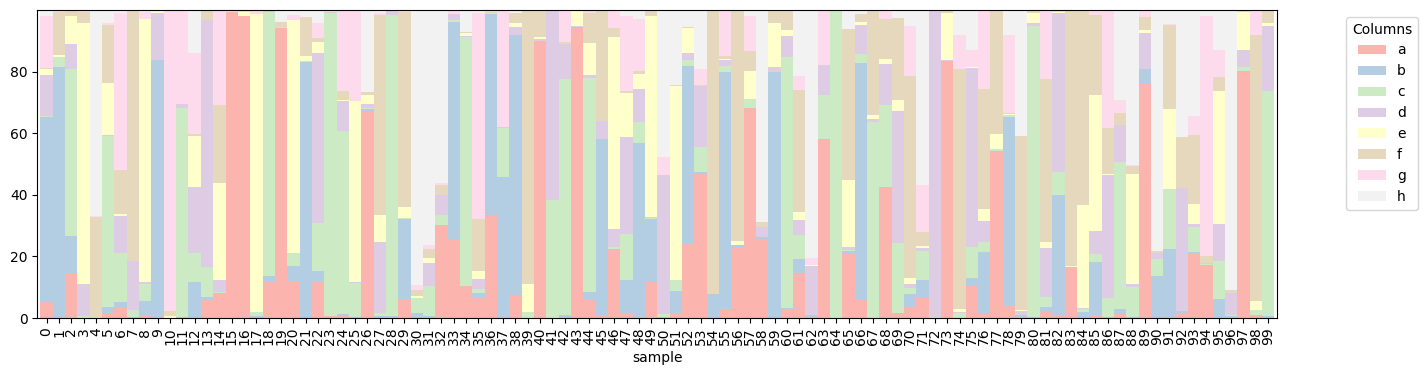

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
#df.plot(kind='bar', stacked=True, width=1, colormap=pastel_cmap, ax=ax)
df.plot(kind='bar', stacked=True, width=1, colormap='Pastel1', ax=ax)
ax.set_xlabel("sample")
ax.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')

# Re-organize the rows

## Algorithmic way

In [25]:
df["max_col"] = df.idxmax(axis=1)

In [28]:
df_sorted = df.sort_values("max_col")

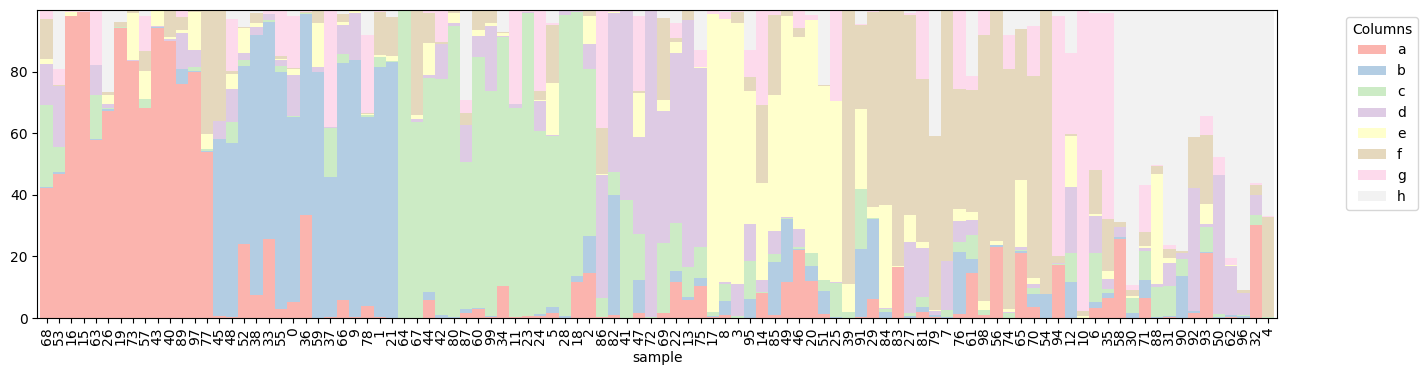

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
df_sorted.plot(kind='bar', stacked=True, width=1, colormap='Pastel1', ax=ax)
ax.set_xlabel("sample")
ax.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')

## Using ChatGPT

Here is the prompt I used:
```
Below is table in markdown format. Re-organize the rows to group the rows that have their maximum value in the same column:
```

In [11]:
%%capture
%pip install tabulate

In [12]:
print(df.to_markdown())

|    |           a |            b |            c |            d |            e |            f |            g |            h |
|---:|------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|
|  0 |  5.27099    | 59.9804      |  0.359716    | 13.1288      |  2.23266     |  0.319514    | 16.8864      |  1.82148     |
|  1 |  0.166663   | 81.3073      |  3.38873     |  0.0216721   |  0.637731    | 13.9639      |  0.0673434   |  0.446665    |
|  2 | 14.4949     | 12.2779      | 53.935       |  8.29097     |  8.93291     |  1.77613     |  0.0647864   |  0.227461    |
|  3 |  0.0106918  |  0.0573564   |  0.469167    | 10.5135      | 84.6522      |  3.61461     |  0.609005    |  0.0734488   |
|  4 |  0.0949381  |  0.0282185   |  0.0327575   |  0.000584067 |  0.00746385  | 32.7166      |  0.129598    | 66.9899      |
|  5 |  1.50983    |  2.13535     | 55.3196      |  0.516441    | 16.7611      | 18.9819      |  0.624746    |  4.1511

ChatGPT's answer is as follows:

To reorganize the table based on the maximum value in each row being grouped by columns, I've grouped and sorted the rows where the maximum values occur in each specific column:

### Maximum in column 'a'
|    |           a |            b |            c |            d |            e |            f |            g |            h |
|---:|------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|
| 15 | 99.2428     |  0.0459891   |  0.00270612  |  0.0195321   |  0.128442    |  0.00160757  |  0.278508    |  0.280389    |
| 16 | 97.8825     |  0.00240025  |  0.0081287   |  0.0426693   |  1.54342     |  0.000408595 |  0.0378359   |  0.482586    |
| 19 | 94.2423     |  0.0410564   |  0.141566    |  0.0207385   |  0.0317161   |  1.53512     |  0.0510668   |  3.93648     |
| 26 | 67.3466     |  0.504471    |  0.404094    |  1.35451     |  2.82079     |  0.911761    |  0.00824033  | 26.6495      |
| 36 | 33.5191     | 65.208       |  0.227488    |  0.0313813   |  0.0241457   |  0.266529    |  0.710204    |  0.0130964   |

### Maximum in column 'b'
|    |           a |            b |            c |            d |            e |            f |            g |            h |
|---:|------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|
|  1 |  0.166663   | 81.3073      |  3.38873     |  0.0216721   |  0.637731    | 13.9639      |  0.0673434   |  0.446665    |
|  9 |  0.326036   | 83.4581      |  0.00212279  | 15.1341      |  0.975966    |  0.000141776 |  0.00153088  |  0.101933    |
| 21 |  0.0282157  | 83.0608      |  0.23595     |  0.0112424   |  1.82084     | 12.4835      |  0.123366    |  2.23608     |
| 38 |  7.38277    | 84.4149      |  0.016756    |  2.65503     |  1.25186     |  3.28434     |  0.0117266   |  0.98258     |
| 33 | 25.5843     | 70.5159      |  0.805196    |  1.77439     |  0.00642584  |  0.0552989   |  0.859021    |  0.399533    |

### Maximum in column 'c'
|    |           a |            b |            c |            d |            e |            f |            g |            h |
|---:|------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|
|  2 | 14.4949     | 12.2779      | 53.935       |  8.29097     |  8.93291     |  1.77613     |  0.0647864   |  0.227461    |
|  5 |  1.50983    |  2.13535     | 55.3196      |  0.516441    | 16.7611      | 18.9819      |  0.624746    |  4.15113     |
|

 13 |  0.0125413  |  0.0761417   | 56.9747      |  1.26814     |  4.00986     |  0.517062    |  0.0541107   | 37.0867      |
| 22 |  0.0140636  |  1.93222     | 98.9682      |  0.00293929  |  0.0173188   |  0.0406838   |  0.0237465   |  0.000314865 |
| 17 |  0.200924   |  0.185236    | 99.6065      |  0.000182117 |  0.000404503 |  0.0012234   |  0.00536304  |  0.000202742 |

### Maximum in column 'd'
|    |           a |            b |            c |            d |            e |            f |            g |            h |
|---:|------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|
| 25 |  0.390123   |  0.336802    |  0.634694    | 98.277       |  0.00373317  |  0.321892    |  0.0342922   |  0.000462058 |
| 10 |  0.548707   |  2.56389     |  0.624996    | 97.9016      |  0.113255    |  0.103549    |  0.00289563  |  0.0411078   |
| 29 |  0.0199653  |  0.0245861   |  0.0233398   | 98.2422      |  0.0275134   |  0.225062    |  0.120057    |  1.31723     |
| 30 |  0.0670613  |  0.573563    |  0.0800314   | 98.7695      |  0.146889    |  0.176127    |  0.0112931   |  0.174941    |
| 18 |  0.539331   |  0.0311832   |  0.0361286   | 99.3606      |  0.0152613   |  0.00113338  |  0.0153498   |  0.00111178  |

### Maximum in column 'e'
|    |           a |            b |            c |            d |            e |            f |            g |            h |
|---:|------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|
|  0 |  1.64752    |  0.0993687   |  0.112681    |  0.309033    | 94.7391      |  0.853373    |  2.13739     |  0.101526    |
| 12 |  0.0389268  |  0.135304    |  0.403262    |  0.285437    | 98.9451      |  0.000211739 |  0.189259    |  0.00260817  |
| 24 |  0.00491833 |  0.0911974   |  0.0418831   |  0.250586    | 99.6013      |  0.000539075 |  0.00218773  |  0.00739235  |
| 31 |  0.0288742  |  0.00666665  |  0.00596468  |  0.00566015  | 98.5845      |  0.010244    |  0.00538072  |  1.35333     |
| 20 |  0.196377   |  0.214764    |  0.00629658  |  0.442691    | 98.9036      |  0.20016     |  0.0353802   |  0.000732271 |

This arrangement prioritizes rows based on the highest value in specific columns. Each grouping displays rows where the maximum value is significantly higher compared to other entries in that column, offering a clear view of which rows have dominant values per column.

First of all, it had the right approach. Unfortunately, it stopped too early and left out 3 columns (f, g, h).

Next, let's check if it got the right samples for the columns it did:

In [32]:
df.query("max_col=='a'")

,a,b,c,d,e,f,g,h,max_col
15,99.242826,0.045989,0.002706,0.019532,0.128442,0.001608,0.278508,0.280389,a
16,97.882550,0.002400,0.008129,0.042669,1.543421,0.000409,0.037836,0.482586,a
19,94.242256,0.041056,0.141566,0.020739,0.031716,1.535117,0.051067,3.936483,a
26,67.346606,0.504471,0.404094,1.354515,2.820788,0.911761,0.008240,26.649524,a
40,90.016947,0.000321,0.022497,0.667953,0.369608,8.870088,0.052376,0.000211,a
43,94.239517,0.204601,0.143165,0.101106,5.223041,0.080319,0.006410,0.001841,a
53,46.851115,0.391133,8.153421,19.834739,0.028314,0.484683,4.986720,19.269875,a
57,68.023528,0.173126,2.742333,0.006110,9.298925,6.556929,11.377331,1.821717,a
63,57.862369,0.085160,14.427980,9.597424,0.017315,0.073294,17.920024,0.016433,a
68,42.125030,0.265353,26.803129,13.199426,1.595982,13.008100,2.940805,0.062174,a


So....nope. ChatGPT didn't get all the samples, and it added some samples incorrectly (like '36')